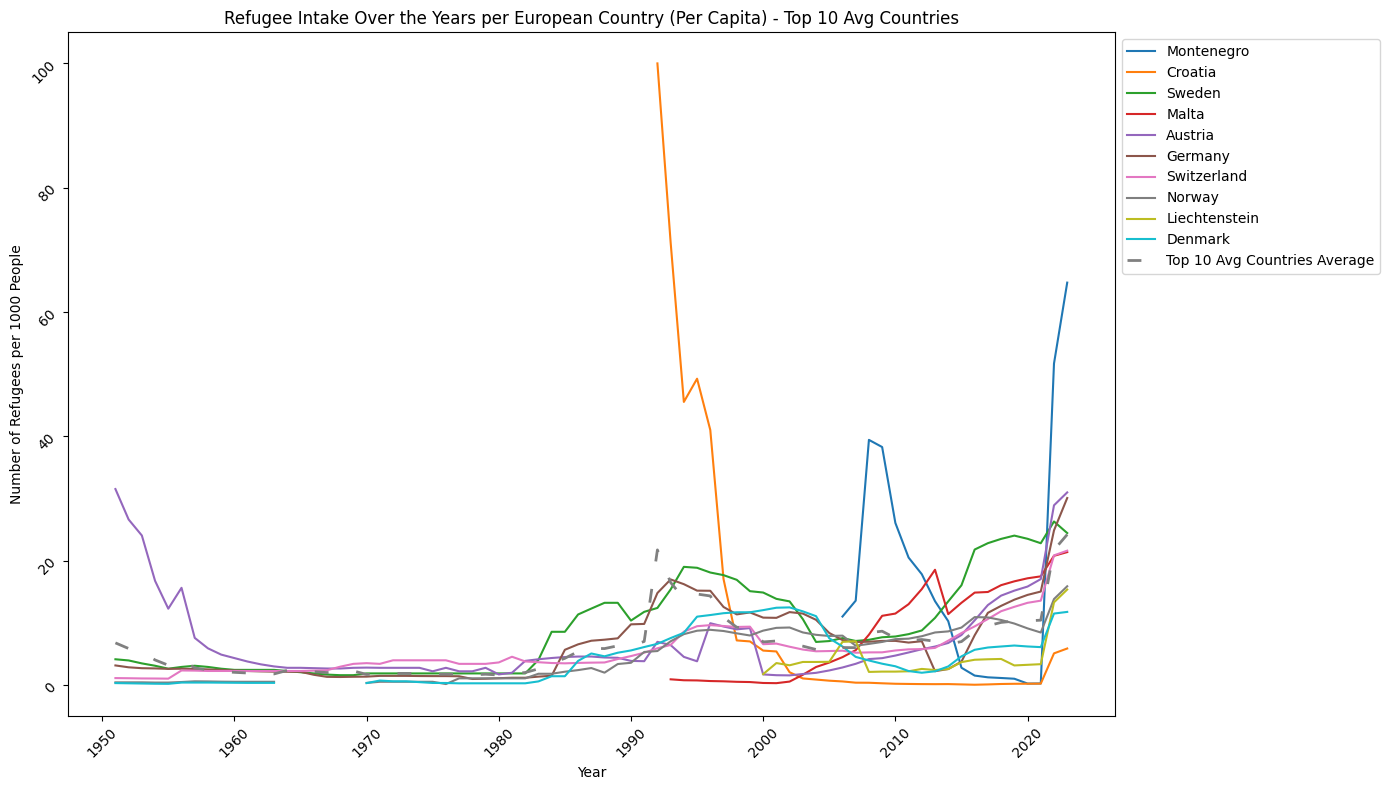

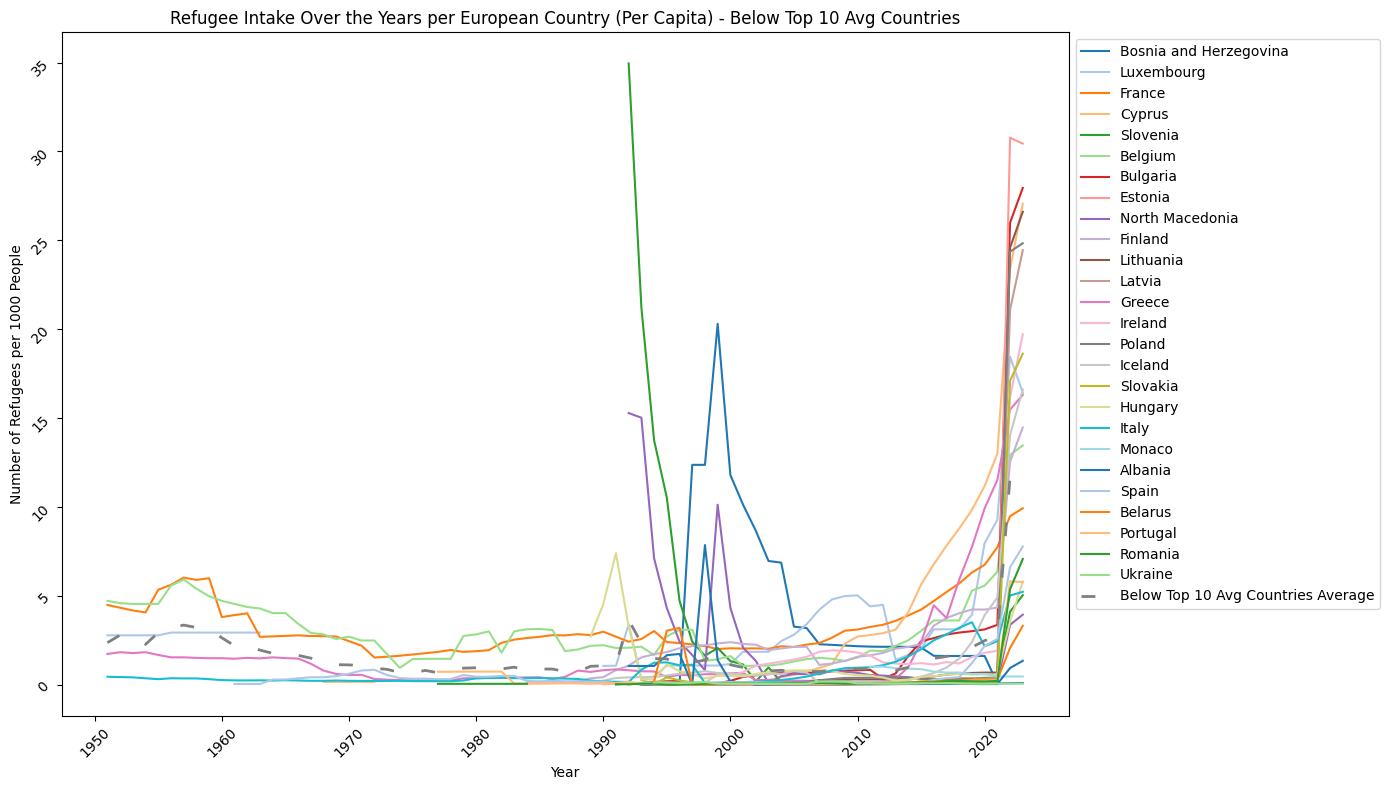

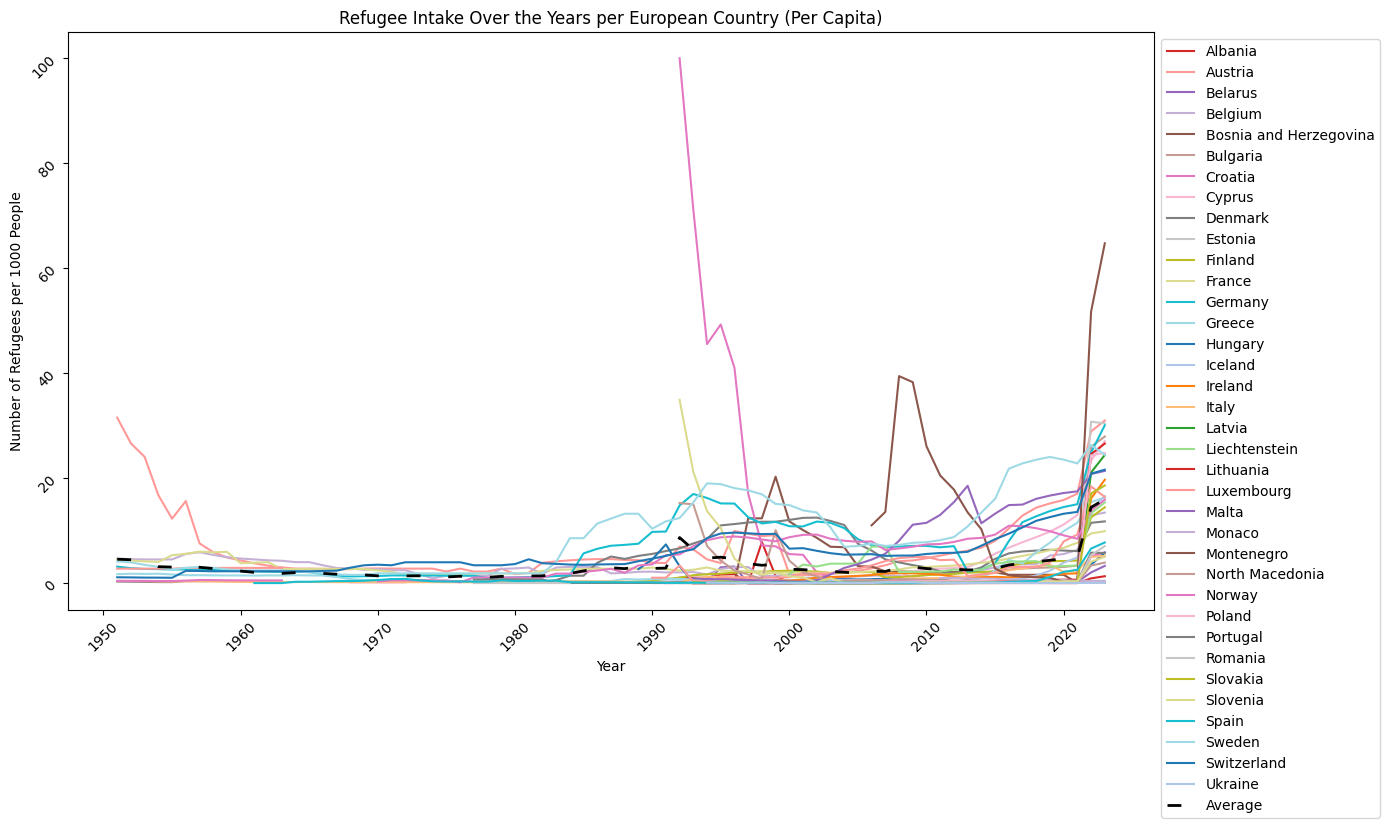

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Define a list of line styles
line_styles = ['-', '--', '-.', ':']

# Define a custom striped line style
striped_line = (0, (5, 10))

# Define remaining colors cycle
remaining_colors = itertools.cycle(plt.cm.tab20.colors)

# Load the population data from the provided CSV file
population_file_path = 'european_population.csv'
population_data = pd.read_csv(population_file_path)

# Merge refugee data with population data
# For simplicity, we'll use the 2022 population data for all years
population_2022 = population_data[['Country/Territory', '2022 Population']]
population_2022.columns = ['Country of asylum', 'Population']

# Merge population data with refugee data
data_with_population = data.merge(population_2022, on='Country of asylum', how='left')

# Calculate refugees per capita
data_with_population['Refugees per 1000'] = (data_with_population['Refugees under UNHCR\'s mandate'] / data_with_population['Population']) * 1000

# Extract relevant columns and group by year and country
data_grouped_per_capita = data_with_population.groupby(['Year', 'Country of asylum'])['Refugees per 1000'].sum().unstack()

# Calculate the average line
average_line_per_capita = data_grouped_per_capita.mean(axis=1)

# Re-calculate top 10 countries by average refugee intake per capita
average_refugees_per_year_per_capita = data_grouped_per_capita.mean()
top_10_avg_countries_per_capita = average_refugees_per_year_per_capita.sort_values(ascending=False).head(10).index

# Create a distinct color map for the top 10 average countries
top_10_avg_colors_per_capita = {country: color for country, color in zip(top_10_avg_countries_per_capita, plt.cm.tab10.colors)}

# Calculate the average line for the top 10 average countries
top_10_avg_countries_data_per_capita = data_grouped_per_capita[top_10_avg_countries_per_capita]
top_10_avg_line_per_capita = top_10_avg_countries_data_per_capita.mean(axis=1)

# Plot for the top 10 average countries per capita
plt.figure(figsize=(14, 8))
for country in top_10_avg_countries_per_capita:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle='-', color=top_10_avg_colors_per_capita[country])

# Plot the top 10 average line with a different striped style
plt.plot(data_grouped_per_capita.index, top_10_avg_line_per_capita, label='Top 10 Avg Countries Average', linestyle=striped_line, color='grey', linewidth=2)

# Set plot title and labels
plt.title('Refugee Intake Over the Years per European Country (Per Capita) - Top 10 Avg Countries')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 People')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Calculate the average line for the countries below top 10 average
below_top_10_avg_countries_per_capita = average_refugees_per_year_per_capita.sort_values(ascending=False).iloc[10:].index
below_top_10_avg_countries_data_per_capita = data_grouped_per_capita[below_top_10_avg_countries_per_capita]
below_top_10_avg_line_per_capita = below_top_10_avg_countries_data_per_capita.mean(axis=1)

# Plot for the countries below top 10 average per capita
plt.figure(figsize=(14, 8))
for country in below_top_10_avg_countries_per_capita:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle=next(itertools.cycle(line_styles)), color=next(remaining_colors))

# Plot the below top 10 average line with a different striped style
plt.plot(data_grouped_per_capita.index, below_top_10_avg_line_per_capita, label='Below Top 10 Avg Countries Average', linestyle=striped_line, color='grey', linewidth=2)

# Set plot title and labels
plt.title('Refugee Intake Over the Years per European Country (Per Capita) - Below Top 10 Avg Countries')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 People')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Plot for all countries with per capita values
plt.figure(figsize=(14, 8))
for country in data_grouped_per_capita.columns:
    plt.plot(data_grouped_per_capita.index, data_grouped_per_capita[country], label=country, linestyle=next(itertools.cycle(line_styles)), color=next(remaining_colors))

# Plot the average line with a striped style
plt.plot(data_grouped_per_capita.index, average_line_per_capita, label='Average', linestyle=striped_line, color='black', linewidth=2)

# Set plot title and labels
plt.title('Refugee Intake Over the Years per European Country (Per Capita)')
plt.xlabel('Year')
plt.ylabel('Number of Refugees per 1000 People')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()